In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

### Homework 3.1.1 - Fourier Series

A periodic function with a period of $T=2$ can be decomposed into a Fourier series with the coefficients below:

$$
{\displaystyle {\begin{aligned}a_{0}= {\frac {2}{3}}\\a_{n}= {\frac {4}{\pi ^{2}n^{2}}}\\b_{n}= 0\\\end{aligned}}}
$$

$$
{\displaystyle f(t)={\frac {a_{0}}{2}}+\sum _{n=1}^{N}\left(a_{n}\cos \left({\tfrac {2\pi }{T}}nt\right)+b_{n}\sin \left({\tfrac {2\pi }{T}}nt\right)\right)}
$$

Use sufficiently large number of $N$ to reconstruct the periodict function $f(x)$ by ploting the graph for $-8 < t < 8$.


$$
    f(t) = \frac{a_{0}}{2} + \sum _{n=1}^{N} \left( a_{n} \cos \left( \frac{2\pi}{2} nt \right) + 0 \right)
$$
$$
    f(t) = \frac{a_{0}}{2} + \sum _{n=1}^{N} \left( a_{n} \cos \left( \pi nt \right) \right)
$$

In [2]:
def f(t):
    N = 500
    a0 = 2/3
    to_return = a0/2
    for n in range(1, N+1):
        a_n = 4/((np.pi**2)*(n**2))
        to_return += a_n*np.cos(np.pi*n*t)
    return to_return

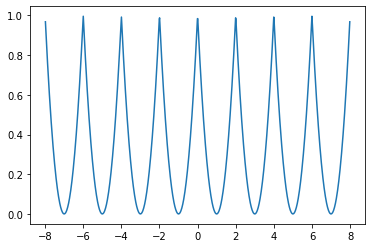

In [3]:
t = np.linspace(-8, 8, 1000)
t = t[1:-1]
y = [f(x) for x in t]
plt.plot(t, y)

___
### Homework 3.1.2

A function $f(x)$ is given by the code and is shown below. Given that the function is periodict function between $-4 < x < 4$, find the first 100 coefficients of the Fourier series and use that coefficients to reconstruct the signal for $-16 < x < 16$.

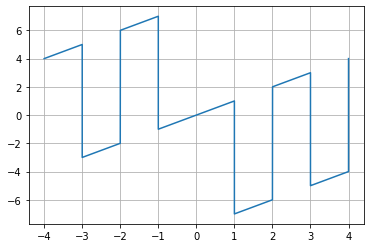

In [4]:
def f(x):
    if (x > 4) or (x < -4):
        raise Exception("Out of bound")
    elif (-4 <= x < -3) or (-2 <= x < -1):
        return x + 8
    elif (1 <= x < 2) or (3 <= x < 4):
        return x - 8
    else:
        return x

x = np.linspace(-4,4,100000)
y = [f(e) for e in x]
plt.plot(x, y)
plt.grid()
plt.show()

$$
    f(x) = a_{0} + \sum _{n=1}^{N} \left( a_{n} \cos \left( \frac{\pi nx}{T} \right) + b_{n} \sin \left( \frac{\pi nx}{T} \right) \right)
$$
$$
    a_{n} = \frac{1}{T} \int_{-T}^{T} f(x) \cos \left( \frac{\pi nx}{T} \right) dx
$$
$$
    b_{n} = \frac{1}{T} \int_{-T}^{T} f(x) \sin \left( \frac{\pi nx}{T} \right) dx
$$

In [5]:
T = 4
a0 = 0
N = 100

In [6]:
def a(x, n):
    return f(x)*np.cos(np.pi*n*x/T)
    
def b(x, n):
    return f(x)*np.sin(np.pi*n*x/T)

def coefficients():
    a_n = []
    b_n = []
    for n in range(1, N+1):
        a_n.append((1/T) * quad(a, -T, T, args=(n))[0])
        b_n.append((1/T) * quad(b, -T, T, args=(n))[0])
    return a_n, b_n

In [7]:
a_n, b_n = coefficients()

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_13584/454429672.py:12: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  b_n.append((1/T) * quad(b, -T, T, args=(n))[0])


In [8]:
def fourier_series(x, a_n, b_n):
    to_return = a0
    for n in range(1, N+1):
        to_return += a_n[n-1]*np.cos(np.pi*n*x/T) + b_n[n-1]*np.sin(np.pi*n*x/T)
    return to_return

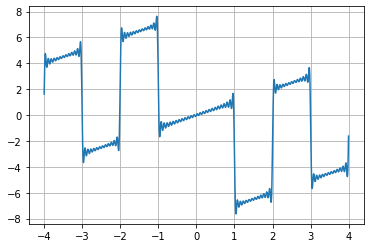

In [9]:
xs = np.linspace(-4, 4, 1000)
xs = xs[1:-1]
ys = [fourier_series(x, a_n, b_n) for x in xs]
plt.plot(xs, ys)
plt.grid()

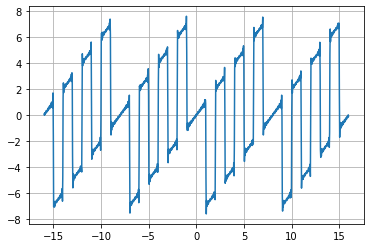

In [10]:
xs = np.linspace(-16, 16, 1000)
xs = xs[1:-1]
ys = [fourier_series(x, a_n, b_n) for x in xs]
plt.plot(xs, ys)
plt.grid()